<div style="display: flex; background-color: RGB(255,114,0);" >

# PROJET - Cojoden
</div>

<div style="display: flex; background-color: blue;" >

# 0. Référentiel : Développer la gestion des données analytiques d’un projet d’application
</div>

<div style="display: flex; background-color: Green; padding: 7px;" >

### 0.1. Rapport
</div>

- La documentation des sources de données identifiées nécessaires au projet, en fonction des résultats de l’analyse exploratoire.
- Les visualisations synthétisant les caractéristiques du ou des jeux de données.
- Le script de nettoyage des données.
- Les éléments de modélisation des données - schémas, requêtes, etc.
- La procédure de mise en place du système de gestion de base de données analytique.
- Le script d’insertion des données dans le système de gestion de base de données.

<div style="display: flex; background-color: Green; padding: 7px;" >

### 0.2. Soutenance
</div>

- Développer la gestion des données analytiques d’un projet d’application
- La documentation des sources de données identifiées nécessaires au projet, en fonction des résultats de l’analyse exploratoire.
- Les visualisations synthétisant les caractéristiques du ou des jeux de données - screenshot ou via un applicatif.
- La stratégie de nettoyage des données.
- Les éléments de modélisation des données - schémas, requêtes, etc.
- La justification du ou des systèmes de gestion de bases de données analytique adaptés à la modélisation des données.
- La procédure de mise en place du système de gestion de base de données analytique.

<div style="display: flex; background-color: Green; padding: 7px;" >

### 0.3. Démonstration
</div>

La démonstration doit présenter les éléments suivant :
- Le nettoyage des données.
- L’insertion des données dans le système de gestion de base de données

<div style="display: flex; background-color: blue;" >

# 1.La mission
</div>

La Coopérative des Joyeux Denisoviens, la CoJoDen, une agence de voyages engagée vient de vous embaucher pour créer un prototype informatique.

La CoJoDen a pour objectif d'étoffer son offre et monter en gamme en proposant à ses clients des séjours culturels thématiques. Ces séjours seront définis dynamiquement en fonction des souhaits du client.

Par exemple notre nouvelle cliente italienne Mme Gherardini souhaite organiser un petit périple pour découvrir les oeuvres de Gaston Chaissac. Elle ne dispose que d'un weekend et voudrait limiter ses déplacements à deux musées. Si vous regardez dans https://www.pop.culture.gouv.fr/ et vous faites une recherche sur Gaston Chaissac (plusieurs auteurs avec des casses différentes), vous trouverez des oeuvres principalement sur Nantes et Colmar. Vous pourrez proposer un séjour à cette dame en lui indiquant le temps estimé pour aller d'un lieu à l'autre (à vous de trouver un moyen de récupérer le temps de trajet, ce denier point est optionnel dans un premier temps).

A partir d'un extrait la base de donnée Joconde accessible au grand public, vous modéliserez une base de données relationnelle MySQL qui regroupera les informations que vous jugerez nécessaires.

Vous peuplerez la base avec les oeuvres disponibles en nettoyant et en homogénéisant au maximum les infos.
Vous créerez un code python qui servira de démonstrateur sur quelques exemples simples.

### Livrables

- Faites un démonstrateur python de faisabilité avec quelques références (stockage et accès aux
données)
- Au niveau des livrables, voici ce qu'il faudra: Script python du démonstrateur, pdf de modèle de base (PAS DE NOTEBOOK)
Si on a le temps cette semaine vous ferez une présentation de 10 min de votre programme.
Si c'est trop court pour vous, on fera ça lors de notre prochaine semaine de formation

- NoSQL pour la sauvegarde des PDF et images

### Ressources

- https://www.data.gouv.fr/fr/datasets/collections-des-musees-de-france-base-joconde/


Nomenclature des champs :
Ce jeu de données comprend l’intégralité du catalogue collectif des musées de France. Les notices d’objets des musées de France sont de toute nature (archéologie, beaux-arts, ethnologie…).
Le détail de la nomenclature de la liste des champs de la base Joconde est téléchargeable ci-dessous, voir "Pièce jointe".

<div style="display: flex; background-color: blue;" >

# 2.Exploration des données
</div>

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.1. Chargement des données
</div>

In [1]:
from os import getcwd
from os.path import join
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import csv
import re
import cojoden_nettoyage as cojonet
from IPython.core.display import HTML
from cojoden_functions import color_graph_background, get_na_columns_classement, convert_string_to_search_string, convert_df_string_to_search_string
from collections import Counter

In [2]:
# ---------------------------------------------------------------------------------------------
#                               MAIN
# ---------------------------------------------------------------------------------------------
verbose = 0

# Récupère le répertoire du programme
file_path = getcwd() + "\\"
data_set_path = file_path + "dataset\\"

data_set_file_name = "base-joconde-extrait.csv"

print(f"Current execution path : {file_path}")
print(f"Dataset path : {data_set_path}")

Current execution path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_cojoden_avance\
Dataset path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_cojoden_avance\dataset\


In [3]:
# Chargement et nettoyage général
df_origin = cojonet.load_data(data_set_path=data_set_path,data_set_file_name=data_set_file_name, verbose=verbose)
display(HTML(df_origin.head().to_html()))

(650853, 27) données chargées ------> ['ref', 'pop_coordonnees', 'autr', 'bibl', 'comm', 'deno', 'desc', 'dims', 'domn', 'dpt', 'ecol', 'hist', 'lieux', 'loca', 'loca2', 'mill', 'museo', 'nomoff', 'paut', 'peri', 'pins', 'prep', 'region', 'repr', 'tech', 'titr', 'ville_']


,ref,pop_coordonnees,auteur,bibl,commentaires,type_oeuvre,description,dimensions,domaine,geo_departement,geo_ecole_pays,hist,creation_lieux,lieux_conservation,geo_pays_region_ville,creation_millesime,museo,nom_officiel_musee,auteur_precisions,creation_periode,inscription_precisions,sujet_precisions,geo_region,sujet,materiaux_technique,titre,geo_ville
0,M0435002007,"49.112285,2.21638",LE GULUCHE Joseph Marie,33 ; 196 ; 44,NaN,statuette,"Terre cuite d'édition ; terre cuite, naturel","l. 30 cm ; H. 65 cm ; P. 22 cm ; VOLUM. 0,0429",sculpture,Val-d'Oise,France,"voir aussi : 2010.0.4, 2010.0.87 En Détresse",France;Ile-de-France;Val d'Oise;L'Isle-Adam (lieu de création),L'Isle-Adam;musée Louis Senlecq,NaN,1890 entre;1908 et,M0435,musée d'Art et d'Histoire Louis Senlecq,"Plourivo, 1849; Villejuif, 1915",4e quart 19e siècle;1er quart 20e siècle,Signé sur la terrasse au revers de la pièce : J. Le Guluche ; Cachet : Alphonse Hanne n°92 ; Inscription à l'avant de la pièce : En Détresse,groupe de deux pêcheurs et un enfant en détresse à la proue d'une embarcation en difficulté,Ile-de-France,"scène (naufrage, tempête, vague, bateau, marin pêcheur, homme, enfant, peur)",terre cuite,En Détresse,L'Isle-Adam
1,M0435001924,"49.112285,2.21638",THOMSEN Constant,NaN,NaN,buste,"terre cuite, naturel","l. 30 CM ; H. 62 CM ; P. 23 CM ; VOLUM. 0,0428",sculpture,Val-d'Oise,Danemark,voir aussi : n° 2010.0.25 Buste de Renet Tener,NaN,L'Isle-Adam;musée Louis Senlecq,NaN,NaN,M0435,musée d'Art et d'Histoire Louis Senlecq,"né en 1860 ; mort en 1921, actif vers 1893",4e quart 19e siècle;1er quart 20e siècle,"Signé au revers de la pièce sur l'épaule droite : C. Thomsen ; Cachet au revers de la pièce : Union Artistique de la Sculpture Française, et en dessous cachet rectangulaire : 8016 LE MFI PARIS ; Inscription à l'avant de la pièce : BAZEILLES","le titre : Bazeilles, fait peut-être un rappel de l'épisode de la guerre de 1870 : la bataille à Bazeilles",Ile-de-France,"portrait (homme, en buste, expression du visage, douleur)",terre cuite,Bazeilles,L'Isle-Adam
2,M0435002028,"49.112285,2.21638",FJERDINGSTAD Christian (orfèvre),NaN,NaN,vase,Vase ovoïde sur talon en étain,"H. 16,4 cm",orfèvrerie,Val-d'Oise,Danemark,"voir aussi : 2010.5.1, 2010.5.2, 2010.5.3, 2010.5.4, 2010.5.5",France;Ile-de-France;Val d'Oise;L'Isle-Adam (lieu de création),L'Isle-Adam;musée Louis Senlecq,NaN,1920 entre;1930 et,M0435,musée d'Art et d'Histoire Louis Senlecq,"né en 1891 ; mort en 1968 ; Christian Fjerginstad avait son atelier d'orfèvrerie à L'Isle-Adam de 1921 à 1960, 19 rue Martel, il travailla pour Christofle de 1921 à 1941",1ère moitié 20e siècle,Poinçon : Etain de L'Isle-Adam ; n° 10-89 à l'intérieur du talon de la pièce ; signé à l'intérieur du talon : FJERGINSTAD,NaN,Ile-de-France,NaN,étain,NaN,L'Isle-Adam
3,08120020599,"49.890413,2.295968",DUTHOIT Louis,NaN,NaN,NaN,Encre sur papier calque collé sur papier blanc,Hauteur en cm 10.7 ; Largeur en cm 8,dessin,Somme,France,NaN,NaN,Amiens;musée de Picardie,Picardie ; Somme,1850,M0812,musée de Picardie,"DUTHOIT : Amiens, 1807/04/15 ; Amiens, 1874/12/30 ; nationalité : Française",3e quart 19e siècle,"monogrammé, en bas à gauche : L D ; annoté, sur le montage, en haut. Cette annotation correspond à l'intitulé de la planche : DAOURS ; annoté, sur le montage, en bas : Porte","Ce dessin représente une porte d'édifice à Daours (Somme), avec tympan et archivolte sculptée.",Hauts-de-France,"vue d'architecture (Daours, porte, archivolte)","encre, papier calque, papier (blanc)","Porte d'un édifice, à Daours ; Daours : Porte (autre titre)",Amiens
4,08120020608,"49.890413,2.295968",DUTHOIT Aimé;DUTHOIT Louis,NaN,NaN,NaN,Encre sur papier calque collé sur papier blanc,Hauteur en cm 9.4 ; Largeur en cm 12.8,dessin,Somme,France,NaN,NaN,Amiens;musée de Picardie,Picardie ; Somme,1850,M0812,musée de Picardie,"DUTHOIT Aimé : Amiens, 1803/11/24 ; Amiens, 1869/02/20 ; nationalité : Française#DUTHOIT Louis : Amiens, 1807/04/15 ; Amiens, 1874/12/30 ; national

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.2. Analyse des NaN
</div>

Le shape initial est de `(650853, 65)`


Suite à un premier chargement et une première analyse, nous obtenons le pourcentage de NA présent par colonne tel que :

```
0 => 16 ['ref', 'pop_contient_geolocalisation', 'pop_coordonnees', 'base', 'contient_image', 'copy', 'domn', 'dpt', 'inv', 'loca', 'museo', 'nomoff', 'producteur', 'region', 'stat', 'ville_']
3 => 1 ['image']
8 => 1 ['label']
9 => 1 ['tech']
10 => 1 ['dims']
11 => 1 ['dmis']
13 => 1 ['loca2']
16 => 1 ['peri']
17 => 1 ['autr']
19 => 1 ['dacq']
21 => 1 ['titr']
31 => 2 ['aptn', 'phot']
34 => 1 ['deno']
36 => 1 ['paut']
37 => 1 ['ecol']
45 => 2 ['dmaj', 'repr']
49 => 1 ['msgcom']
50 => 1 ['desc']
57 => 1 ['mill']
61 => 2 ['historique', 'pins']
67 => 1 ['insc']
72 => 1 ['bibl']
73 => 3 ['lieux', 'prep', 'www']
75 => 2 ['comm', 'hist']
77 => 1 ['larc']
79 => 1 ['gene']
81 => 2 ['etat', 'util']
88 => 2 ['decv', 'expo']
90 => 1 ['epoq']
93 => 1 ['depo']
94 => 2 ['appl', 'drep']
95 => 2 ['ddpt', 'pdec']
96 => 2 ['attr', 'puti']
97 => 3 ['plieux', 'refmis', 'srep']
98 => 2 ['peoc', 'peru']
99 => 10 ['adpt', 'geohi', 'manquant', 'manquant_com', 'milu', 'onom', 'refmem', 'refmer', 'refpal', 'retif']
100 => 1 ['nsda']
```

![Heat map des NA](img/na_dataset.png)

Je décide donc de supprimer toutes les colonnes qui ont un pourcentage de NA > 75 %, pour cela, je vais les exclure dès le chargement des données.

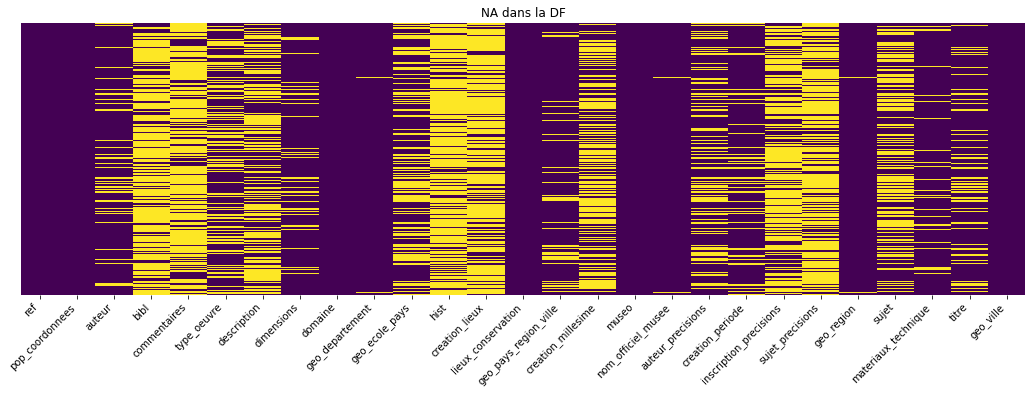

In [4]:
figure, ax = color_graph_background(1,1)
sns.heatmap(df_origin.isnull(), yticklabels=False,cbar=False, cmap='viridis')
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("NA dans la DF")
figure.set_size_inches(18, 5, forward=True)
plt.show()

In [5]:
# df_global_full_clean = remove_na_columns(df_global_full, max_na=85, verbose=verbose, inplace=False)
na_columns_class = get_na_columns_classement(df_origin.copy(), verbose=1)

0 => 9 ['ref', 'pop_coordonnees', 'domaine', 'geo_departement', 'lieux_conservation', 'museo', 'nom_officiel_musee', 'geo_region', 'geo_ville']
9 => 1 ['materiaux_technique']
10 => 1 ['dimensions']
13 => 1 ['geo_pays_region_ville']
16 => 1 ['creation_periode']
17 => 1 ['auteur']
21 => 1 ['titre']
34 => 1 ['type_oeuvre']
36 => 1 ['auteur_precisions']
37 => 1 ['geo_ecole_pays']
45 => 1 ['sujet']
50 => 1 ['description']
57 => 1 ['creation_millesime']
61 => 1 ['inscription_precisions']
72 => 1 ['bibl']
73 => 2 ['creation_lieux', 'sujet_precisions']
75 => 2 ['commentaires', 'hist']


<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.3. Analyse des données
</div>

In [6]:
df_origin.describe()

,ref,pop_coordonnees,auteur,bibl,commentaires,type_oeuvre,description,dimensions,domaine,geo_departement,...,nom_officiel_musee,auteur_precisions,creation_periode,inscription_precisions,sujet_precisions,geo_region,sujet,materiaux_technique,titre,geo_ville
count,650853,650853,538804,178968,159876,426375,320511,581866,650851,644769,...,644769,414860,544555,249738,171724,644683,351558,587634,512385,650803
unique,639325,535,70076,127357,89749,21998,202281,361826,6343,98,...,428,51828,1598,203663,123191,15,241899,68499,346340,428
top,08880000225,"48.859903,2.340929",anonyme,Annales du Muséum d'Histoire Naturelle de Nice...,Datation : blog d'Antoine Sausverd : Topfferiana,tableau,Mine de plomb sur papier,H. 9 ; l. 14,dessin,Paris,...,musée du Louvre,"Paris, 1840 ; Meudon, 1917",19e siècle,L.1915 A,iconographie religieuse,Ile-de-France,paysage,mine de plomb,(Sans titre),Paris
freq,2,140845,58279,6119,1155,63839,1968,2504,236209,190773,...,142102,12720,46937,1741,1190,265436,7147,33202,4656,190110


In [7]:
df_origin.describe(include="all")

,ref,pop_coordonnees,auteur,bibl,commentaires,type_oeuvre,description,dimensions,domaine,geo_departement,...,nom_officiel_musee,auteur_precisions,creation_periode,inscription_precisions,sujet_precisions,geo_region,sujet,materiaux_technique,titre,geo_ville
count,650853,650853,538804,178968,159876,426375,320511,581866,650851,644769,...,644769,414860,544555,249738,171724,644683,351558,587634,512385,650803
unique,639325,535,70076,127357,89749,21998,202281,361826,6343,98,...,428,51828,1598,203663,123191,15,241899,68499,346340,428
top,08880000225,"48.859903,2.340929",anonyme,Annales du Muséum d'Histoire Naturelle de Nice...,Datation : blog d'Antoine Sausverd : Topfferiana,tableau,Mine de plomb sur papier,H. 9 ; l. 14,dessin,Paris,...,musée du Louvre,"Paris, 1840 ; Meudon, 1917",19e siècle,L.1915 A,iconographie religieuse,Ile-de-France,paysage,mine de plomb,(Sans titre),Paris
freq,2,140845,58279,6119,1155,63839,1968,2504,236209,190773,...,142102,12720,46937,1741,1190,265436,7147,33202,4656,190110


<div style="display: flex; background-color: indigo;" >

#### 2.3. Value counts
</div>

In [8]:
print(df_origin['lieux_conservation'].value_counts())

Paris;musée du Louvre département des Arts graphiques                  133448
Saint-Germain-en-Laye;musée d'Archéologie nationale                     35896
Marseille;musée des Civilisations de l'Europe et de la Méditerranée     21268
Sèvres;Sèvres - Cité de la céramique                                    17348
Chantilly;musée Condé                                                   13679
                                                                        ...  
Nîmes;musée des beaux -arts                                                 1
Vizille;Musée de la Révolution française                                    1
Nîmes;Muséum d'Histoire Naturelle                                           1
ParisÂ;musée de la musique;manquant                                         1
dépôt;Laon;musée archéologique municipal                                    1
Name: lieux_conservation, Length: 1048, dtype: int64


<div style="display: flex; background-color: indigo;" >

#### 2.5. Traitement de l'encodage
</div>

Suite à la première analyse, il y a un soucis d'encodage dans toute la DF, j'ai décidé de traiter l'encodage en ligne de commandes directement dans le fichier source, par exemple :
- `sed -i "s/Ã¹/ù/g" base-joconde-extrait_encoding.csv`
- `grep -E 'Ã' base-joconde-extrait_encoding.csv`
- `sed -i "s/àle-de-France/Ile-de-France/g" base-joconde-extrait_encoding.csv`

Cependant le à ne semble pas pouvoir être traité avec cette méthode, je le remplace donc dans la DF.

In [9]:
df_encode = cojonet.proceed_encoding(df_origin, verbose=verbose)

<div style="display: flex; background-color: indigo;" >

#### 2.4. Doublons
</div>

Il semble y avoir des doublons sur la référence, il est préférable de vérifier : 
- aucun doublon sur la totalité de la ligne
- vérification des doublons sur la référence : `11528 rows` en doublon sur la référence

In [10]:
df_encode[df_encode.duplicated()]

,ref,pop_coordonnees,auteur,bibl,commentaires,type_oeuvre,description,dimensions,domaine,geo_departement,...,nom_officiel_musee,auteur_precisions,creation_periode,inscription_precisions,sujet_precisions,geo_region,sujet,materiaux_technique,titre,geo_ville
184868,08880000514,"0.0,0.0",ISLER Véra,NaN,NaN,tirage photographique,Photographie noir et blanc sur Papier Marouflé,"H. 165, L. 118",photographie,Alpes-Maritimes,...,musée d'Art Moderne et d'Art Contemporain,"Berlin, 1931 ; femme",4e quart 20e siècle,NaN,NaN,Provence-Alpes-Côte d'Azur,NaN,NaN,Portrait de William Wegman,Nice
185128,08880000100,"0.0,0.0",GAINON Jacqueline,". Autour de Nice... : Acropolis, Nice, juin 19...",NaN,tableau,Acrylique sur toile,"H. 170, L. 140",peinture,Alpes-Maritimes,...,musée d'Art Moderne et d'Art Contemporain,"Nice, 1951 ; femme",4e quart 20e siècle,S.B.G.: J.Gainon,NaN,Provence-Alpes-Côte d'Azur,NaN,NaN,Tango,Nice
185140,08880001129,"0.0,0.0",CHUBAC Albert,NaN,NaN,NaN,Collage,"H. 64, L. 49",dessin,Alpes-Maritimes,...,musée d'Art Moderne et d'Art Contemporain,"Genève, 1925",4e quart 20e siècle,NaN,NaN,Provence-Alpes-Côte d'Azur,NaN,NaN,Sans titre,Nice
185388,04640008298,"0.0,0.0",anonyme (photographe);KODAK (éditeur),NaN,NaN,tirage photographique,NaN,Hauteur en mm 95 ; Longueur en mm 136,photographie,Gard,...,musée Pierre-de-Luxembourg,NaN,20e siècle,"nom de l'éditeur, Verso : TRAITE PAR / KODAK /...",NaN,Occitanie,"paysage (Villeneuve-lès-Avignon, maison, olivier)","papier, noir et blanc",Villeneuve-lès-Avignon : mazet et olivier,Villeneuve-lès-Avignon
185496,02470000389,"0.0,0.0",GEORGIN François (graveur);PELLERIN (fabrique),NaN,NaN,NaN,Chromoxylographie sur papier vergé,Hauteur en cm 63 ; Largeur en cm 48,estampe,Indre,...,musée Bertrand,"GEORGIN François : ?, 1801 ; ?, 1863#PELLERIN ...",19e siècle,NaN,NaN,Centre-Val de Loire,NaN,"papier vergé (xylographie, couleur)",La Colonne,Châteauroux
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649202,04640006767,"0.0,0.0",anonyme (photographe);PREVOT (éditeur),NaN,NaN,carte postale,NaN,Hauteur en mm 89 ; Longueur en mm 139,photographie,Gard,...,musée Pierre-de-Luxembourg,"Edit Prévot, 26, République, Avignon",1er quart 20e siècle,"titre, Haut et centre : 2 bis. AVIGNON - Les B...",NaN,Occitanie,vue d'architecture;paysage (Villeneuve-lès-Avi...,"papier cartonné, imprimé, noir et blanc",Avignon : vue générale depuis Villeneuve,Villeneuve-lès-Avignon
649204,04640006777,"0.0,0.0",anonyme (photographe);RELLA (éditeur),NaN,NaN,carte postale,NaN,Hauteur en mm 90 ; Longueur en mm 141,photographie,Gard,...,musée Pierre-de-Luxembourg,"Editions RELLA, Nice (A.-M.)",20e siècle,"nom de l'éditeur, Bas et droite : Rella ; titr...",NaN,Occitanie,vue d'architecture;paysage (Villeneuve-lès-Avi...,"papier cartonné, imprimé, noir et blanc",Avignon : vue générale depuis Villeneuve,Villeneuve-lès-Avignon
649205,04640008157,"0.0,0.0",MAROTTE (graveur);BULLOZ Jacques Ernest (éditeur),NaN,NaN,carte postale,NaN,Hauteur en mm 90 ; Longueur en mm 140,photographie;estampe,Gard,...,musée Pierre-de-Luxembourg,"BULLOZ : Paris, 1858 ; Paris, 1942 ; J.-E. Bul...",20e siècle,"titre, Recto : N°20714. - ENGUERRAND CHARONTON...",NaN,Occitanie,"paysage (Villeneuve-lès-Avignon, Vierge, Chris...","papier cartonné, héliogravure",Villeneuve-lès-Avignon : Le Couronnement de la...,Villeneuve-lès-Avignon
649210,05630030212,"43.608897,1.441776",NaN,"Ernest Roschach , Musée de Toulouse. Catalogue...",NaN,statue;fragment,"Roschach 1865 p. 94 : ""Fragments de sculptures...",Hauteur en cm 8 ; Longueur en cm 21 ; Largeur ...,archéologie;sculpture;romain,Haute-Garonne,...,musée Saint-Raymond,NaN,1er siècle av JC,NaN,NaN,Occitanie,"(main, anneau)",marbre,Main gauche,Toulouse


In [11]:
df_clean = cojonet.proceed_duplicated(df_encode, verbose=verbose)

<div style="display: flex; background-color: indigo;" >

#### 2.4. Traitement des NA
</div>

- Remplacement des Sans Titre
- Remplacement des anonyme
- `91 970` lignes n'ont ni auteur, ni titre, ni description, ni tout autre complément permettant de d'aboutir sur ces objets. je les supprime donc.
- Titre et Auteur : `151 647` lignes n'ont ni auteur, ni titre : générer un titre pertient à partir des descriptions.
- Type Oeuvre
- Création d'une colonne de texte avec toutes les colonnes de descriptions

In [12]:
df_clean_na = cojonet.proceed_na_values(df_clean, verbose=verbose)

In [13]:
df_pre_clean = df_clean_na[['ref', 'titre', 'auteur', 'texte','type_oeuvre',
       'materiaux_technique', 'dimensions','museo',
       'nom_officiel_musee', 'domaine', 'pop_coordonnees', 'geo_ville', 'geo_departement', 'geo_region',
       'geo_pays_region_ville', 'geo_ecole_pays', 'creation_millesime',
       'creation_lieux', 'lieux_conservation', 
       'inscription_precisions','sujet_precisions', 'sujet',  'description', 'commentaires']]
display(HTML(df_pre_clean.head().to_html()))

,ref,titre,auteur,texte,type_oeuvre,materiaux_technique,dimensions,museo,nom_officiel_musee,domaine,pop_coordonnees,geo_ville,geo_departement,geo_region,geo_pays_region_ville,geo_ecole_pays,creation_millesime,creation_lieux,lieux_conservation,inscription_precisions,sujet_precisions,sujet,description,commentaires
0,M0435002007,En Détresse,LE GULUCHE Joseph Marie,"groupe de deux pêcheurs et un enfant en détresse à la proue d'une embarcation en difficulté. Terre cuite d'édition ; terre cuite, naturel. scène (naufrage, tempête, vague, bateau, marin pêcheur, homme, enfant, peur)",statuette,terre cuite,"l. 30 cm ; H. 65 cm ; P. 22 cm ; VOLUM. 0,0429",M0435,musée d'Art et d'Histoire Louis Senlecq,sculpture,"49.112285,2.21638",L'Isle-Adam,Val-d'Oise,Ile-de-France,NaN,France,1890 entre;1908 et,France;Ile-de-France;Val d'Oise;L'Isle-Adam (lieu de création),L'Isle-Adam;musée Louis Senlecq,Signé sur la terrasse au revers de la pièce : J. Le Guluche ; Cachet : Alphonse Hanne n°92 ; Inscription à l'avant de la pièce : En Détresse,groupe de deux pêcheurs et un enfant en détresse à la proue d'une embarcation en difficulté,"scène (naufrage, tempête, vague, bateau, marin pêcheur, homme, enfant, peur)","Terre cuite d'édition ; terre cuite, naturel",NaN
1,M0435001924,Bazeilles,THOMSEN Constant,"le titre : Bazeilles, fait peut-être un rappel de l'épisode de la guerre de 1870 : la bataille à Bazeilles. terre cuite, naturel. portrait (homme, en buste, expression du visage, douleur)",buste,terre cuite,"l. 30 CM ; H. 62 CM ; P. 23 CM ; VOLUM. 0,0428",M0435,musée d'Art et d'Histoire Louis Senlecq,sculpture,"49.112285,2.21638",L'Isle-Adam,Val-d'Oise,Ile-de-France,NaN,Danemark,NaN,NaN,L'Isle-Adam;musée Louis Senlecq,"Signé au revers de la pièce sur l'épaule droite : C. Thomsen ; Cachet au revers de la pièce : Union Artistique de la Sculpture Française, et en dessous cachet rectangulaire : 8016 LE MFI PARIS ; Inscription à l'avant de la pièce : BAZEILLES","le titre : Bazeilles, fait peut-être un rappel de l'épisode de la guerre de 1870 : la bataille à Bazeilles","portrait (homme, en buste, expression du visage, douleur)","terre cuite, naturel",NaN
2,M0435002028,Vase ovoïde sur talon en étain,FJERDINGSTAD Christian (orfèvre),Vase ovoïde sur talon en étain,vase,étain,"H. 16,4 cm",M0435,musée d'Art et d'Histoire Louis Senlecq,orfèvrerie,"49.112285,2.21638",L'Isle-Adam,Val-d'Oise,Ile-de-France,NaN,Danemark,1920 entre;1930 et,France;Ile-de-France;Val d'Oise;L'Isle-Adam (lieu de création),L'Isle-Adam;musée Louis Senlecq,Poinçon : Etain de L'Isle-Adam ; n° 10-89 à l'intérieur du talon de la pièce ; signé à l'intérieur du talon : FJERGINSTAD,NaN,NaN,Vase ovoïde sur talon en étain,NaN
3,08120020599,"Porte d'un édifice, à Daours ; Daours : Porte (autre titre)",DUTHOIT Louis,"Ce dessin représente une porte d'édifice à Daours (Somme), avec tympan et archivolte sculptée. Encre sur papier calque collé sur papier blanc. vue d'architecture (Daours, porte, archivolte)","encre, papier calque, papier (blanc) Encre sur papier calque collé sur papier blanc","encre, papier calque, papier (blanc)",Hauteur en cm 10.7 ; Largeur en cm 8,M0812,musée de Picardie,dessin,"49.890413,2.295968",Amiens,Somme,Hauts-de-France,Picardie ; Somme,France,1850,NaN,Amiens;musée de Picardie,"monogrammé, en bas à gauche : L D ; annoté, sur le montage, en haut. Cette annotation correspond à l'intitulé de la planche : DAOURS ; annoté, sur le montage, en bas : Porte","Ce dessin représente une porte d'édifice à Daours (Somme), avec tympan et archivolte sculptée.","vue d'architecture (Daours, porte, archivolte)",Encre sur papier calque collé sur papier blanc,NaN
4,08120020608,L'église de Démuin ; Demuin : L'église (autre titre),DUTHOIT Aimé;DUTHOIT Louis,"Ce dessin représente l'église de Démuin (Somme), côté sud-est. Encre sur papier calque collé sur papier blanc. paysage;vue d'architecture (Démuin, village, place, église, personnage)","encre, papier calque, papier (blanc) Encre sur papier calque collé s

<div style="display: flex; background-color: deeppink;" >

##### Etat des lieux des NaN après traitement
</div>

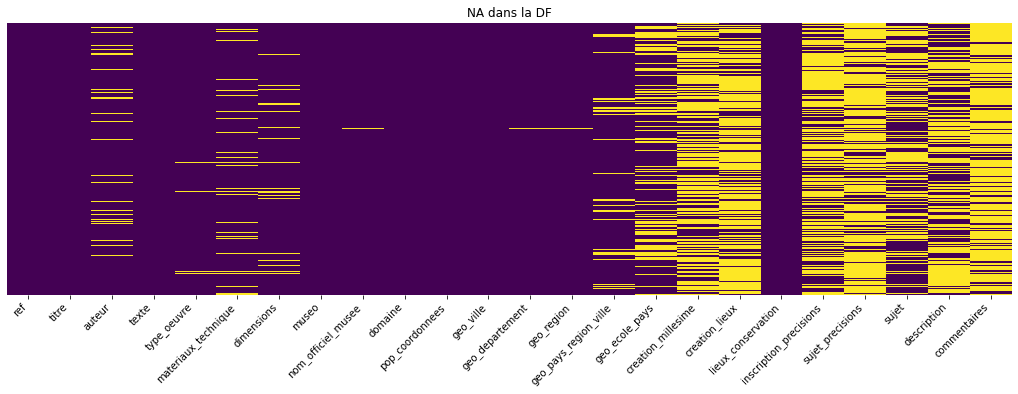

In [14]:
figure, ax = color_graph_background(1,1)
sns.heatmap(df_pre_clean.isnull(), yticklabels=False,cbar=False, cmap='viridis')
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("NA dans la DF")
figure.set_size_inches(18, 5, forward=True)
plt.show()

<div style="display: flex; background-color: blue;" >

# 3.Nettoyage des données
</div>

<div style="display: flex; background-color: green;" >

## 3.1. Extension des données
</div>

In [15]:
# Dimension
df_clean_data1 = cojonet.expand_dimensions(df=df_pre_clean.copy(), verbose=verbose)
# Date de création
df_clean_data2 = cojonet.expand_millesime(df_clean_data1.copy(), verbose=verbose)
# Coordonnées
df_clean_data2 = cojonet.expand_coordonnate(df_clean_data2.copy(), verbose=verbose)
# Simplification du titre
df_clean_data2.loc[df_clean_data2["titre"].notna(),"titre"] = df_clean_data2.loc[df_clean_data2["titre"].notna(),"titre"].apply(lambda x:cojonet.clean_titre(x, verbose=verbose))
# Traitement du lieu de création
df_clean_data2.loc[df_clean_data2["creation_lieux"].notna(),"creation_lieux"] = df_clean_data2.loc[df_clean_data2["creation_lieux"].notna(),"creation_lieux"].apply(lambda x:cojonet.clean_lieux_creation(x, verbose=verbose))

In [16]:
df_clean_data3 = df_clean_data2[['ref', 'titre', 'auteur','annee_debut', 'annee_fin',
       'domaine', 'type_oeuvre', 'materiaux_technique',
       'museo', 'nom_officiel_musee', 'latitude', 'longitude', 'geo_ville',
       'geo_departement', 'geo_region', 'geo_ecole_pays', 'creation_lieux', 'largeur_cm', 'hauteur_cm', 'profondeur_cm',
       'inscription_precisions', 'texte']]
df_clean_data3 = df_clean_data3.sort_values(by=['ref'])
df_clean_data3 = df_clean_data3.reset_index()
df_clean_data3 = df_clean_data3.drop(columns=["index"])
df_clean_data3 = df_clean_data3.reset_index()
df_clean_data3["index"] = df_clean_data3["index"] +1 
df_clean_data3 = df_clean_data3.set_index("index")
df_clean_data3.shape

(605157, 22)

<div style="display: flex; background-color: green;" >

## 3.2 Traitement de tous les textes
</div>

In [17]:
df_clean_data3.columns

Index(['ref', 'titre', 'auteur', 'annee_debut', 'annee_fin', 'domaine',
       'type_oeuvre', 'materiaux_technique', 'museo', 'nom_officiel_musee',
       'latitude', 'longitude', 'geo_ville', 'geo_departement', 'geo_region',
       'geo_ecole_pays', 'creation_lieux', 'largeur_cm', 'hauteur_cm',
       'profondeur_cm', 'inscription_precisions', 'texte'],
      dtype='object')

In [18]:
for col in ['auteur', 'domaine',
       'type_oeuvre', 'materiaux_technique', 'nom_officiel_musee',
       'geo_ville', 'geo_departement', 'geo_region',
       'geo_ecole_pays', 'creation_lieux', 'inscription_precisions', 'texte']:
    df_clean_data3.loc[df_clean_data3[col].notna(),col] = df_clean_data3.loc[df_clean_data3[col].notna(),col].apply(lambda x:cojonet.clean_text(x, verbose=verbose-1))

In [19]:
# Uniformisation des métiers dans la colonne auteur
df_clean_data4 = df_clean_data3.copy()
df_clean_data4.loc[df_clean_data4["auteur"].notna(),"auteur"] = df_clean_data4.loc[df_clean_data4["auteur"].notna(),"auteur"].apply(lambda x:cojonet.standardize_metier(x, verbose=verbose))

In [20]:
# Uniformisation des identifiants de musées
df_clean_data5 = df_clean_data4.copy()
df_clean_data5.loc[df_clean_data5["museo"].notna(),"museo"] = df_clean_data5.loc[df_clean_data5["museo"].notna(),"museo"].apply(lambda x:cojonet.clean_museo(x, verbose=verbose))

In [21]:
display(HTML(df_clean_data5[df_clean_data5["auteur"].notna()].head().to_html()))

,ref,titre,auteur,annee_debut,annee_fin,domaine,type_oeuvre,materiaux_technique,museo,nom_officiel_musee,latitude,longitude,geo_ville,geo_departement,geo_region,geo_ecole_pays,creation_lieux,largeur_cm,hauteur_cm,profondeur_cm,inscription_precisions,texte
index,,,,,,,,,,,,,,,,,,,,,,
1,00000000001,Le tableau représente au premier plan le Calavon vu vers l'aval,TORINY Gratien Désiré Huet De - (peintre),NaN,NaN,peinture,tableau,"toile, bois (peinture à l'huile)",M0945,musée municipal d'archéologie,43.875736,5.397687,Musées d'Apt,Vaucluse,Provence-Alpes-Côte d'Azur,NaN,Apt,25.0,37.5,0.0,"(français ), En bas à droite : H. de Toriny ; (français ), au revers : Manuscrit au crayon., 'Vue du Pont-Julien à Bonnieux'","Le tableau représente au premier plan le Calavon vu vers l'aval; au bord de la rivière sont arrêtés une charette à deux roues, deux animaux dételés et un personnage. Un peu plus loin, un cavalier (ou une cavalière ) fait boire son cheval dans la rivière. La rive droite de la rivière ressemble à une plage sableuse, plate et large ; elle est dominée par un petit escarpement rocheux. Sur la rive gauche on devine un berger menant son troupeau, alors que la toiture d'une maison se distingue derrière les monticules rocheux. Au second plan, le Pont-Julien lance ses trois arches par-dessus le lit de la rivière. Les deux piles centrales sont fondées sur des massifs qui se distinguent par leur couleur grise dans la masse brune du pont. La montée nord du pont prolonge la ligne du Luberon dont la masse, en arrière-plan, semble enveloppée d'une brume que le peintre a traitée en camaïeu violacé. Un ciel bleu occupant toute la moitié supérieure du tableau est traversé de quelques nuages à frange rosée."
13,00000000013,Reproduction du buste reliquaire de Sainte Anne,LÉON SAGY,NaN,NaN,sculpture,"faïence fine monochrome (moulage, glaçure) Reproduction du buste reliquaire de Sainte Anne","faïence fine monochrome (moulage, glaçure)",M0945,musée municipal d'archéologie,43.875736,5.397687,Musées d'Apt,Vaucluse,Provence-Alpes-Côte d'Azur,NaN,NaN,10.2,19.8,0.0,dans le fond : L. Sagy Apt,"Reproduction du buste reliquaire de Sainte Anne, conservé à la Cathédrale d'Apt, reposant sur quatre lions, en faïence fine à émail jaune et monté sur socle. Le visage de la sainte aux traits précis est encadré par les plis d'un voile qui lui couvre les épaules en un fin drapé. Elle porte une couronne de fleurs de lis et palmes montées sur un bandeau orné d'étoiles. Un voile fin lui couvre le cou jusqu'au menton, en drapés horizontaux et elle porte une croix fixée sur un tour de cou décoré au poinçon sur l'encolure de sa robe décoré de fleurettes en creux également. Un bandeau à motifs ovales en creux, fait le tour de ses épaules et retient son voile. Une tête d'ange aux ailes déployées orne son buste qui est souligné à sa base d'une frise imprimée de losanges en creux. Fond intérieur du buste évidé à parois irrégulières et émaillé, à bord ébréché en plusieurs endroits. Il repose sur les dos de quatre lions modelés, couchés en diagonale aux angles du socle, mais est brisé à ce niveau en quatre points, sur le bord du buste et sur le dos des lions. Socle à plateau supérieur rectangulaire (ht.: 5 mm.) reposant en corniche soulignée d'une moulure, sur un bord droit qui s'évase en oblique sur une base de 0,6 cm. de haut. Fond intérieur du socle grossièrement évidé, à parois émaillées et à bord plat non émaillé. Signature de Léon Sagy en creux sur le fond intérieur du socle. Modèle identique au n° 72.3.12 Correspondant au moule n° 72.4.11"
14,00000000014,Sculpture allégorique représentant une jeune fille debout,POITEVIN Alexis (sculpteur);BONNET Elzéar (commanditaire),NaN,NaN,sculpture,plâtre (modelage) Sculpture allégorique représentant une jeune fille debout,plâtre (modelage),M0945,musée municipal d'archéologie,43.875736,5.397687,Musées d'Apt,Vaucluse,Provence-Alpes-Côte d'Azur,NaN,NaN,45.0,175.0,0.0,Inscription ancienne: POTEVIN 1801 (gravée dans l'enduit du mur con

<div style="display: flex; background-color: green;" >

## 3. Sauvegarde de la DF nettoyée
</div>

In [22]:
df_clean_finaly = df_clean_data5.copy()

In [23]:
data_set_path_clean = join(data_set_path,data_set_file_name.replace(".csv", "_clean.csv"))
df_clean_finaly.to_csv(data_set_path_clean, index=False)
print(f"DataFrame save in ------> {data_set_path_clean}")
print(f"{df_origin.shape} données origine ------")
print(f"{df_clean_finaly.shape} données clean ------")

DataFrame save in ------> c:\Users\User\WORK\workspace-ia\PROJETS\projet_cojoden_avance\dataset\base-joconde-extrait_clean.csv
(650853, 27) données origine ------
(605157, 22) données clean ------


<div style="display: flex; background-color: green;" >

## 4. Exploration
</div>

In [ ]:
print(df_clean_finaly.loc[df_clean_finaly['geo_ville']=='Rennes', 'geo_departement'].value_counts().index[0])
print(df_clean_finaly.loc[df_clean_finaly['geo_ville']=='Rennes', 'geo_region'].value_counts().index[0])
print(df_clean_finaly.loc[df_clean_finaly['geo_ville']=='Rennes', 'geo_pays_region_ville'].value_counts().index[0])

Ille-et-Vilaine
Bretagne
France ; Bretagne ; Ille-et-Vilaine


<div style="display: flex; background-color: blue;" >

# ANNEXE
</div>

<div style="display: flex; background-color: green;" >

## 2.1. Titre 2
</div>

<div style="display: flex; background-color: indigo;" >

#### Titre 3
</div>

<div style="display: flex; background-color: deeppink;" >

##### Titre4
</div>

<div style="display: flex; background-color: coral;" >

##### Titre 5
</div>